## Exploratory Data Analysis (EDA)




### Project Goal:
Explore relationships between demand (sales) and explanatory variables such as time, price, category, and events to guide feature selection and modeling.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [7]:
df = pd.read_csv("m5_clean_merged_long.csv", low_memory=False)
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.describe()

,sales,date,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI,sell_price_x,sell_price_y,sell_price,day,day_of_week,week_of_year
count,5.832737e+07,58327370,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07,4.602796e+07,4.602796e+07,5.832737e+07,5.832737e+07,5.832737e+07,5.832737e+07
mean,1.126322e+00,2013-09-10 23:59:59.999999488,1.133919e+04,3.997386e+00,6.357554e+00,2.013209e+03,3.293257e-01,3.293257e-01,3.293257e-01,4.408089e+00,4.408089e+00,4.446165e+00,1.570308e+01,3.002614e+00,2.587088e+01
min,0.000000e+00,2011-01-29 00:00:00,1.110100e+04,1.000000e+00,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,2012-05-21 00:00:00,1.121700e+04,2.000000e+00,3.000000e+00,2.012000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.180000e+00,2.180000e+00,2.180000e+00,8.000000e+00,1.000000e+00,1.300000e+01
50%,0.000000e+00,2013-09-11 00:00:00,1.133300e+04,4.000000e+00,6.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+00,3.470000e+00,3.420000e+00,1.600000e+01,3.000000e+00,2.500000e+01
75%,1.000000e+00,2015-01-02 00:00:00,1.144800e+04,6.000000e+00,9.000000e+00,2.015000e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.840000e+00,5.840000e+00,5.840000e+00,2.300000e+01,5.000000e+00,3.900000e+01
max,7.630000e+02,2016-04-24 00:00:00,1.161300e+04,7.000000e+00,1.200000e+01,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.073200e+02,1.073200e+02,1.073200e+02,3.100000e+01,6.000000e+00,5.300000e+01
std,3.873108e+00,NaN,1.503742e+02,2.000652e+00,3.458773e+00,1.532086e+00,4.699684e-01,4.699684e-01,4.699684e-01,3.403657e+00,3.403657e+00,3.525359e+00,8.793482e+00,2.000652e+00,1.512504e+01


### Target Variable Analysis

In [11]:
df["sales"].describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

count    5.832737e+07
mean     1.126322e+00
std      3.873108e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
90%      3.000000e+00
99%      1.500000e+01
max      7.630000e+02
Name: sales, dtype: float64

### Plot distribution:

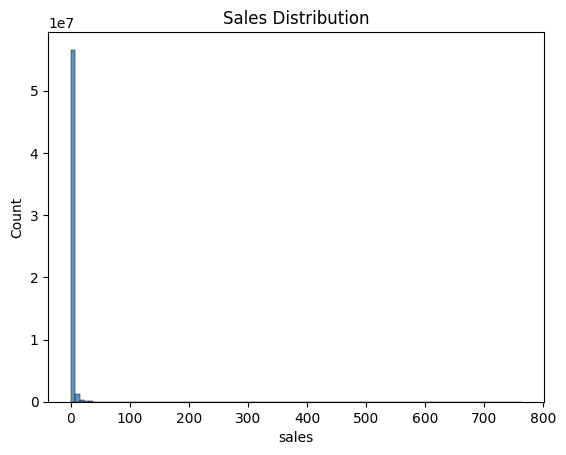

In [12]:
sns.histplot(df["sales"], bins=100)
plt.title("Sales Distribution")
plt.show()

Sales distribution is highly right-skewed with a large proportion of zero-demand days.

## Time Series Exploration

### Total Daily Demand

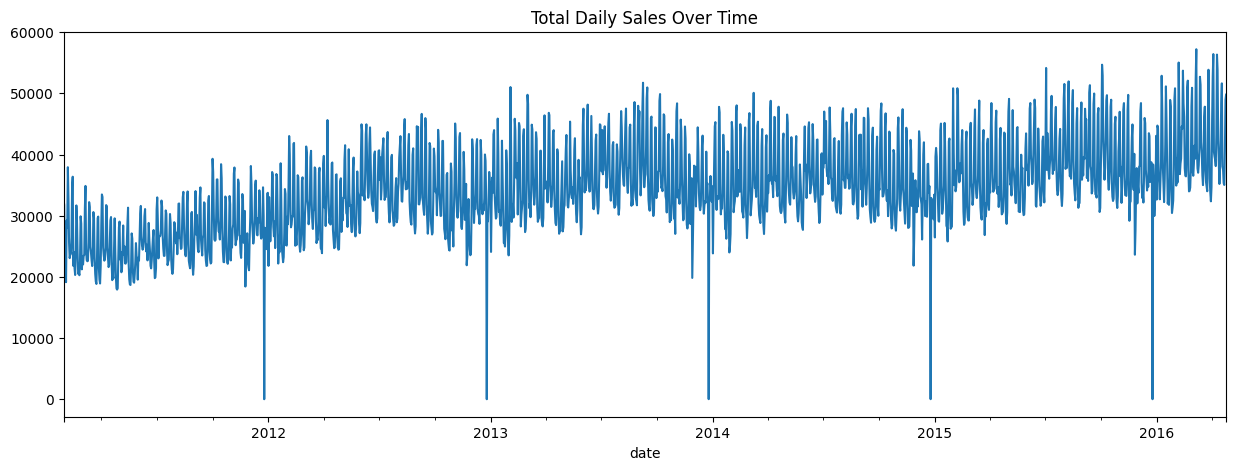

In [13]:
daily_sales = df.groupby("date")["sales"].sum()

plt.figure(figsize=(15,5))
daily_sales.plot()
plt.title("Total Daily Sales Over Time")
plt.show()

### Weekly Rolling Average

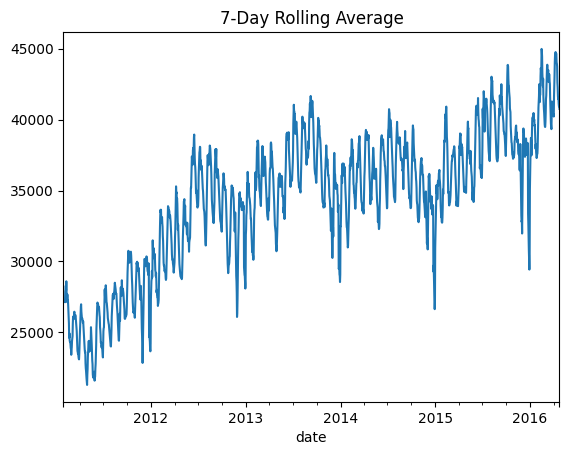

In [14]:
daily_sales.rolling(7).mean().plot()
plt.title("7-Day Rolling Average")
plt.show()

Strong weekly patterns and seasonal spikes are visible, indicating time-based features will be important.

## Seasonality Analysis

### By Day of Week

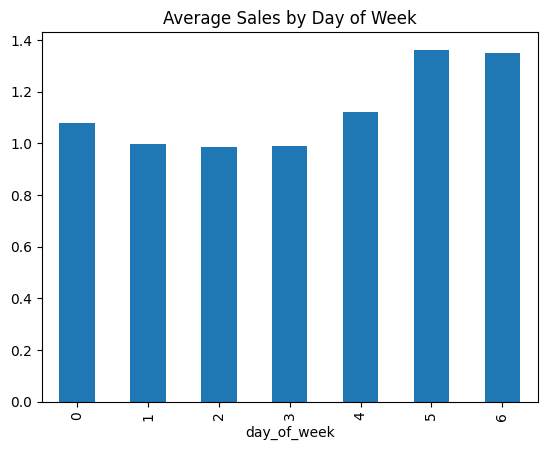

In [17]:
df.groupby("day_of_week")["sales"].mean().plot(kind="bar")
plt.title("Average Sales by Day of Week")
plt.show()

### By Month

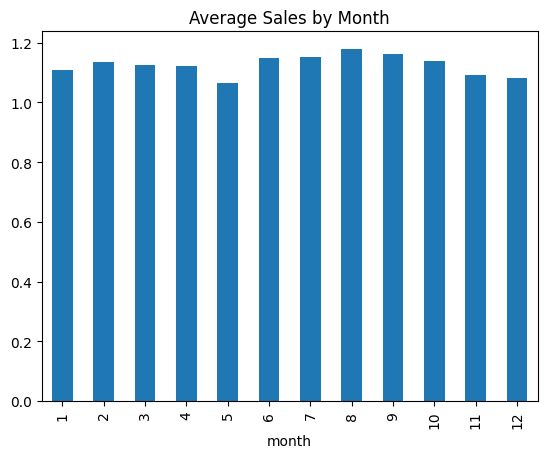

In [18]:
df.groupby("month")["sales"].mean().plot(kind="bar")
plt.title("Average Sales by Month")
plt.show()

## Store & Category Comparison (Subgroup analysis)

### Store comparison

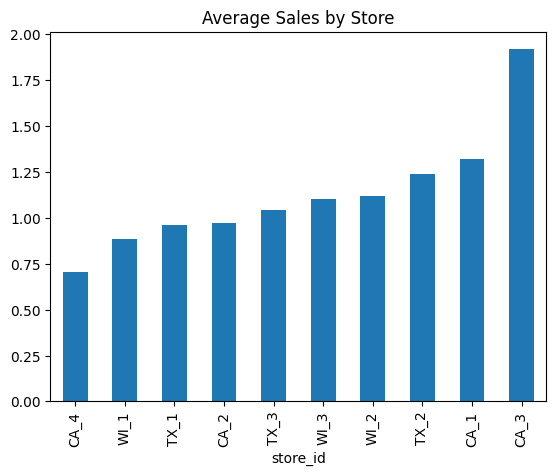

In [19]:
df.groupby("store_id")["sales"].mean().sort_values().plot(kind="bar")
plt.title("Average Sales by Store")
plt.show()

### Category comparison

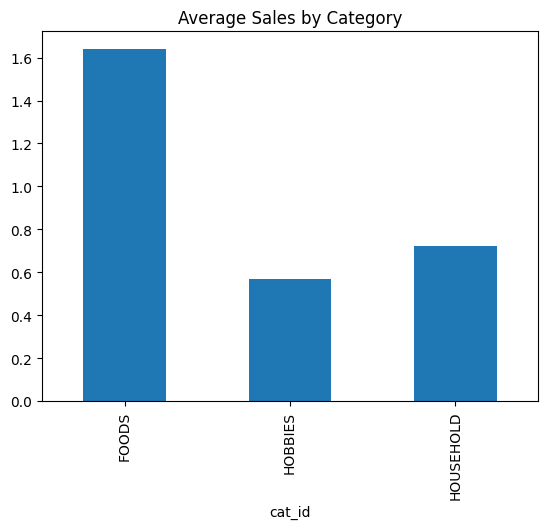

In [20]:
df.groupby("cat_id")["sales"].mean().plot(kind="bar")
plt.title("Average Sales by Category")
plt.show()

## Price vs Sales Relationship (Very Important)

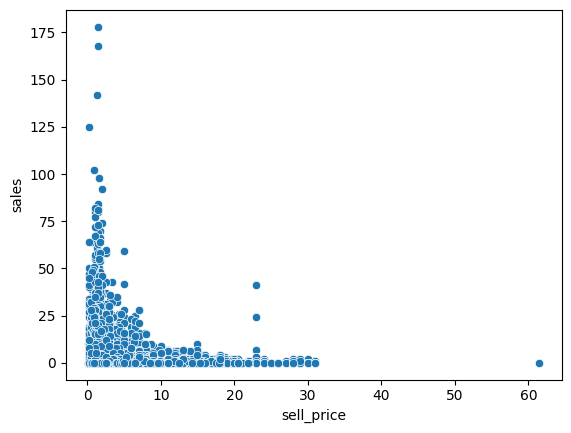

In [21]:
sns.scatterplot(
    x="sell_price",
    y="sales",
    data=df.sample(50000)
)
plt.show()

In [22]:
df[["sales","sell_price"]].corr()

,sales,sell_price
sales,1.000000,-0.131109
sell_price,-0.131109,1.000000


Weak to moderate negative correlation suggests price sensitivity.

## Correlation Matrix (Rubric: Pearson correlations)

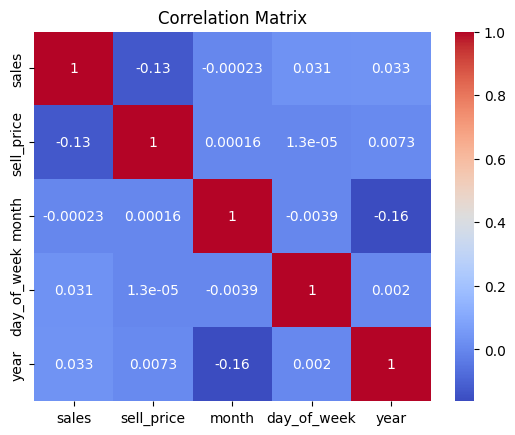

In [23]:
numeric_cols = ["sales","sell_price","month","day_of_week","year"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Inferential Thinking 

In [25]:
from scipy import stats

weekday = df[df["day_of_week"] < 5]["sales"]
weekend = df[df["day_of_week"] >= 5]["sales"]

stats.ttest_ind(weekday.sample(50000), weekend.sample(50000))

TtestResult(statistic=-12.345026802647629, pvalue=5.495328118341934e-35, df=99998.0)

Average weekday sales < average weekend sales

In [28]:
weekday.mean()

1.0341932561807932

In [29]:
weekend.mean()

1.3558038054836694

## Weekday vs Weekend Sales Comparison

Average weekday sales: 1.034  
Average weekend sales: 1.356  

Weekend demand is approximately 31% higher than weekday demand.

Combined with the extremely small p-value from the t-test (p ≈ 5e-35), this confirms that day-of-week has both statistical and practical significance.

Implication:
Day-of-week is a critical feature for demand forecasting and should be encoded carefully in the modeling phase.


## Zero Sales Analysis

In [26]:
zero_ratio = (df["sales"] == 0).mean()
print("Zero demand ratio:", zero_ratio)

Zero demand ratio: 0.6819627560783214


68.2% of all rows have ZERO sales.That is VERY high.

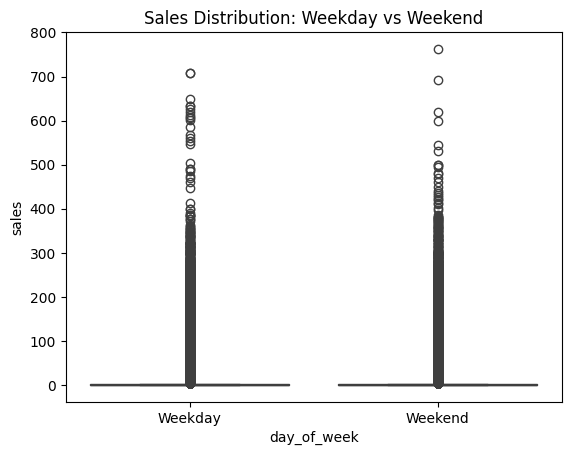

In [31]:
sns.boxplot(x=(df["day_of_week"] >= 5), y=df["sales"])
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.title("Sales Distribution: Weekday vs Weekend")
plt.show()

## Final EDA Summary

### Objective
The purpose of this EDA was to explore the structure of the demand data, understand relationships between features and the target variable (sales), and guide feature selection and modeling decisions for demand forecasting.

---

## Key Findings

### 1. Highly Zero-Inflated Demand
Approximately 68% of observations show zero sales.  
This indicates strongly intermittent demand behavior and a heavily right-skewed distribution.

---

### 2. Weekday vs Weekend Demand Difference
Mean weekday sales: 1.03  
Mean weekend sales: 1.36  

Weekend demand is approximately 31% higher than weekday demand.

A two-sample t-test showed:
- t-statistic = -12.34
- p-value ≈ 5e-35

This confirms a statistically significant and practically meaningful difference between weekday and weekend demand.

Implication:
Day-of-week is a critical predictive feature and must be included in the model.

---

### 3. Distributional Shape & Outliers
Sales distribution is heavily right-skewed with extreme upper outliers.
Weekend sales show more high-demand spikes compared to weekdays.

Implication:
- Demand volatility must be considered.
- Log transformations or robust models may improve performance.

---

### 4. Seasonality Patterns
Time-based aggregation revealed weekly and seasonal patterns in demand.
Rolling averages show consistent temporal structure.

Implication:
Lag features and rolling window statistics are likely to be powerful predictors.

---

## Overall Conclusion

The EDA reveals that demand is:

- Intermittent
- Highly skewed
- Seasonally structured
- Influenced by time-based factors
- Different across subgroups

These findings directly inform the modeling approach and support the use of robust, non-linear methods for demand forecasting and inventory optimization.